# Real Demo With MET Dataset

Smaller version (3GB) containing a subset of the ./MET folder

https://www.kaggle.com/datasets/dschettler8845/the-met-dataset?select=small_MET

In [2]:
%load_ext autoreload
%autoreload 2
from dimension_reduction import *

In [5]:
import os
import numpy as np
from PIL import Image

# takes about 2m to run this
def load_images_from_folders(root_folder, size=(128, 128), mode='RGB'):
    image_data = []
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # checking the extension of the files
                image_path = os.path.join(subdir, file)
                with Image.open(image_path) as img:
                    img = img.convert(mode)  # Convert image to RGB or grayscale
                    img = img.resize(size)  # Resize image to desired size
                    image_data.append(np.array(img))  # Append image array to list

    return np.array(image_data)  # Convert list of arrays to a single 3D NumPy array

root_folder = 'data/MET'  # Replace with the path to your directory
images_array = load_images_from_folders(root_folder)
print(images_array.shape)  # Prints the shape of the array, e.g., (num_images, height, width, channels)

(38307, 128, 128, 3)


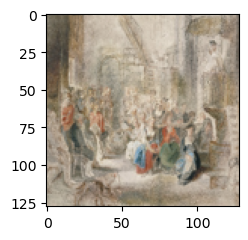

In [17]:
example_image = images_array[20]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(example_image.reshape((128, 128, 3)))
plt.show()

In [20]:
images_array = load_images_from_folders(root_folder, mode='L')
print(images_array.shape)  # Prints the shape of the array, e.g., (num_images, height, width, channels)

(38307, 128, 128)


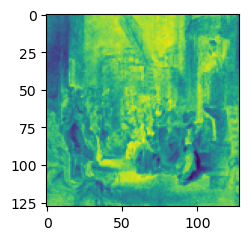

In [21]:
example_image = images_array[20]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(example_image.reshape((128, 128)))
plt.show()

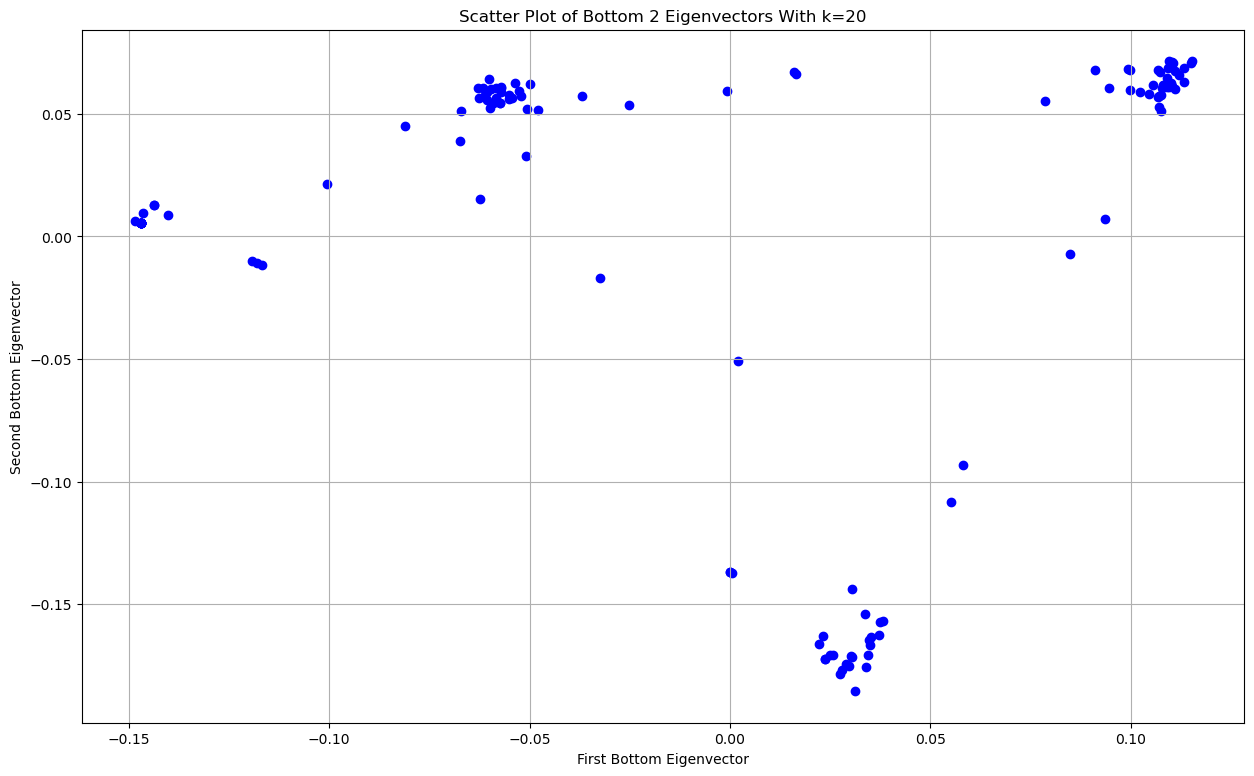

ValueError: cannot reshape array of size 128 into shape (128,128)

In [23]:
laplacian_eigenmap(images_array[0], 20, image_dim=128, random_sample_size=400)